## 데이터 및 라이브러리 로딩

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
train = pd.read_csv('movies_train.csv')
test = pd.read_csv('movies_test.csv')

## 데이터탐색

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [ ]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [ ]:
test.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           243 non-null    object 
 1   distributor     243 non-null    object 
 2   genre           243 non-null    object 
 3   release_time    243 non-null    object 
 4   time            243 non-null    int64  
 5   screening_rat   243 non-null    object 
 6   director        243 non-null    object 
 7   dir_prev_bfnum  107 non-null    float64
 8   dir_prev_num    243 non-null    int64  
 9   num_staff       243 non-null    int64  
 10  num_actor       243 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 21.0+ KB


## 데이터 전처리

In [ ]:
# 결측치가 많은 데이터 제거
train = train.drop(['dir_prev_bfnum'],axis = 1)
test =  test.drop(['dir_prev_bfnum'],axis = 1)

In [ ]:
# 감독명 : 너무 다양해서 제거
train = train.drop(['director'],axis = 1)
test = test.drop(['director'],axis = 1)

In [ ]:
# 제목 : 의미가 없기 때문에 제거
train = train.drop(['title'],axis= 1)
test = test.drop(['title'],axis= 1)

In [ ]:
train.distributor.value_counts().head(15)

CJ 엔터테인먼트    54
롯데엔터테인먼트     52
(주)NEW       30
(주)마운틴픽쳐스    29
(주)쇼박스       26
인디스토리        26
골든타이드픽처스     15
(주) 케이알씨지    14
(주) 영화사조제    10
영화사 진진       10
시네마달         10
어뮤즈          10
(주)키노아이      10
시너지          10
인디플러그         9
Name: distributor, dtype: int64

In [ ]:
train_dist = train.groupby('distributor')['box_off_num'].median().reset_index(name="rank_dist").sort_values('rank_dist',ascending=True)
train_genre = train.groupby('genre')['box_off_num'].median().reset_index(name="rank_genre").sort_values('rank_genre',ascending=True)
train_dist

,distributor,rank_dist
141,인피니티엔터테인먼트,2.0
65,고구마공작소,8.0
92,사람과 사람들,42.0
131,위드시네마,46.0
68,나우콘텐츠,54.0
...,...,...
50,CJ E&M 영화부문,2242510.0
121,영구아트무비,2541603.0
96,쇼박스(주)미디어플렉스,2634823.0
27,(주)아이필름코퍼레이션,3117859.0


In [ ]:
for i in range(train_dist.shape[0]) :
    train_dist['rank_dist'].iloc[i] = i+1
for i in range(train_genre.shape[0]) :
    train_genre['rank_genre'].iloc[i] = i+1
display(train_dist.head())
display(train_genre.head())

C:\Users\com51\AppData\Local\Temp\ipykernel_7452\1722991078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dist['rank_dist'].iloc[i] = i+1
C:\Users\com51\AppData\Local\Temp\ipykernel_7452\1722991078.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_genre['rank_genre'].iloc[i] = i+1


,distributor,rank_dist
141,인피니티엔터테인먼트,1.0
65,고구마공작소,2.0
92,사람과 사람들,3.0
131,위드시네마,4.0
68,나우콘텐츠,5.0


,genre,rank_genre
3,다큐멘터리,1.0
7,미스터리,2.0
5,멜로/로맨스,3.0
6,뮤지컬,4.0
4,드라마,5.0


In [ ]:
train = pd.merge(train,train_dist,how='left')
train = pd.merge(train,train_genre,how='left')
train.drop(['distributor','genre'],axis=1,inplace=True)
test = pd.merge(test,train_dist,how='left')
test = pd.merge(test,train_genre,how='left')
test.drop(['distributor','genre'],axis=1,inplace=True)
train.head()

,release_time,time,screening_rat,dir_prev_num,num_staff,num_actor,box_off_num,rank_dist,rank_genre
0,2012-11-22,96,청소년 관람불가,0,91,2,23398,151.0,11.0
1,2015-11-19,130,청소년 관람불가,2,387,3,7072501,164.0,12.0
2,2013-06-05,123,15세 관람가,4,343,4,6959083,164.0,11.0
3,2012-07-12,101,전체 관람가,2,20,6,217866,158.0,10.0
4,2010-11-04,108,15세 관람가,1,251,2,483387,167.0,10.0


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 242
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   release_time   243 non-null    object 
 1   time           243 non-null    int64  
 2   screening_rat  243 non-null    object 
 3   dir_prev_num   243 non-null    int64  
 4   num_staff      243 non-null    int64  
 5   num_actor      243 non-null    int64  
 6   rank_dist      207 non-null    float64
 7   rank_genre     243 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 17.1+ KB


In [ ]:
test.fillna(0,inplace=True)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 242
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   release_time   243 non-null    object 
 1   time           243 non-null    int64  
 2   screening_rat  243 non-null    object 
 3   dir_prev_num   243 non-null    int64  
 4   num_staff      243 non-null    int64  
 5   num_actor      243 non-null    int64  
 6   rank_dist      243 non-null    float64
 7   rank_genre     243 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 17.1+ KB


In [ ]:
# 개봉일을 바탕으로 년,월 변수 생성
train['year'] = train['release_time'].apply(lambda x: int(x[:4]))
train['month'] = train['release_time'].apply(lambda x: int(x[5:7]))
train =  train.drop(['release_time'],axis = 1)

test['year'] = test['release_time'].apply(lambda x: int(x[:4]))
test['month'] = test['release_time'].apply(lambda x: int(x[5:7]))
test =  test.drop(['release_time'],axis = 1)


In [ ]:
train[['time','num_staff','dir_prev_num']].describe()

,time,num_staff,dir_prev_num
count,600.000000,600.000000,600.000000
mean,100.863333,151.118333,0.876667
std,18.097528,165.654671,1.183409
min,45.000000,0.000000,0.000000
25%,89.000000,17.000000,0.000000
50%,100.000000,82.500000,0.000000
75%,114.000000,264.000000,2.000000
max,180.000000,869.000000,5.000000


In [ ]:
def cut_off_time(x) :
    if 45<=x<80 :
        return 'short'
    elif 80<=x<120 :
        return 'proper'
    else :
        return 'long'

def cut_off_num_staff(x) :
    if x<20 :
        return 'very small'
    elif 20<=x<80 :
        return 'small'
    elif 80<=x<150 :
        return 'proper'
    elif 150<=x<250 :
        return 'large'
    else :
        return 'too many'

def first_movie(x) :
    if x == 0 :
        return 'first'
    else :
        return 'not first'

In [ ]:
# train['time'] = train['time'].apply(cut_off_time)
# train['num_staff'] = train['num_staff'].apply(cut_off_num_staff)
train['first_movie'] = train['dir_prev_num'].apply(first_movie)
# test['time'] = test['time'].apply(cut_off_time)
# test['num_staff'] = test['num_staff'].apply(cut_off_num_staff)
test['first_movie'] = test['dir_prev_num'].apply(first_movie)

In [ ]:
train.head()

,time,screening_rat,dir_prev_num,num_staff,num_actor,box_off_num,rank_dist,rank_genre,year,month,first_movie
0,96,청소년 관람불가,0,91,2,23398,151.0,11.0,2012,11,first
1,130,청소년 관람불가,2,387,3,7072501,164.0,12.0,2015,11,not first
2,123,15세 관람가,4,343,4,6959083,164.0,11.0,2013,6,not first
3,101,전체 관람가,2,20,6,217866,158.0,10.0,2012,7,not first
4,108,15세 관람가,1,251,2,483387,167.0,10.0,2010,11,not first


In [ ]:
# cond = ['time','num_staff','screening_rat','year','month','first_movie']
# train = pd.get_dummies(train, columns=cond)
# test = pd.get_dummies(test, columns=cond)
cond = ['screening_rat','first_movie']
train = pd.get_dummies(train, columns=cond)
test = pd.get_dummies(test, columns=cond)

C:\Users\com51\AppData\Local\Temp\ipykernel_7452\3099025127.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)
C:\Anaconda3\envs\test_01\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  fig.canvas.draw()
C:\Anaconda3\envs\test_01\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from current font.
  fig.canvas.draw()
C:\Anaconda3\envs\test_01\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 46988 (\N{HANGUL SYLLABLE RAM}) missing from current font.
  fig.canvas.draw()
C:\Anaconda3\envs\test_01\lib\si

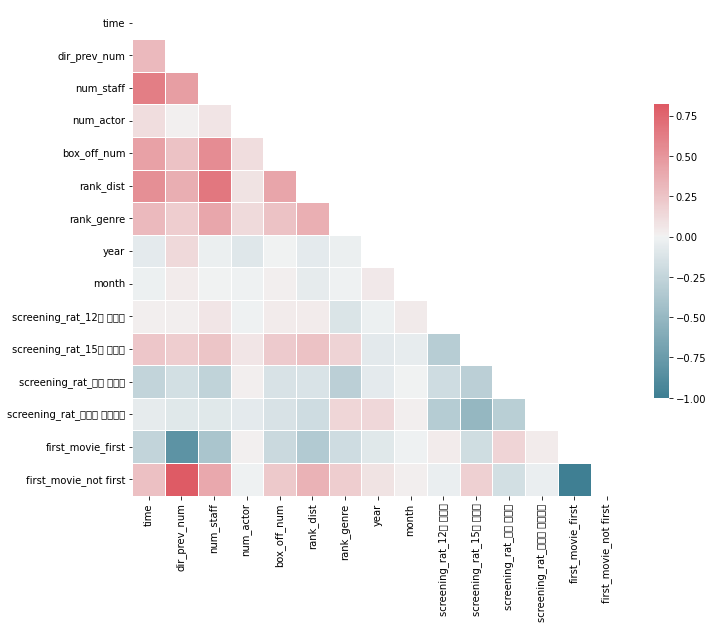

In [ ]:
corr = train.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            linewidths=.5, cbar_kws={"shrink": .6});

In [ ]:
# 상관관계가 너무 없음
train.drop(['year','month'],axis=1,inplace=True)
test.drop(['year','month'],axis=1,inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# cat_cols = train.select_dtypes(include='object').columns
# for col in cat_cols :
#     le = LabelEncoder()
#     train[col]=le.fit_transform(train[col])
#     test[col]=le.fit_transform(test[col])

train.head()

,time,dir_prev_num,num_staff,num_actor,box_off_num,rank_dist,rank_genre,screening_rat_12세 관람가,screening_rat_15세 관람가,screening_rat_전체 관람가,screening_rat_청소년 관람불가,first_movie_first,first_movie_not first
0,96,0,91,2,23398,151.0,11.0,0,0,0,1,1,0
1,130,2,387,3,7072501,164.0,12.0,0,0,0,1,0,1
2,123,4,343,4,6959083,164.0,11.0,0,1,0,0,0,1
3,101,2,20,6,217866,158.0,10.0,0,0,1,0,0,1
4,108,1,251,2,483387,167.0,10.0,0,1,0,0,0,1


## 모델정의 및 학습

In [ ]:
train_x = train.drop(['box_off_num'],axis= 1)
train_y = train['box_off_num']

In [ ]:
from sklearn.model_selection import train_test_split

train_x, valid_x, train_y, valid_y = train_test_split(train_x, train_y, test_size=0.2)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

def ensemble(model) :
    model.fit(train_x,train_y)
    pred = model.predict(valid_x)
    test_pred = model.predict(test)
    print('RMSE: %.3f' % np.sqrt(mean_squared_error(valid_y,pred)))
    return test_pred

In [ ]:
from sklearn.model_selection import GridSearchCV

model=RandomForestRegressor()

params = {'max_depth':[5,10],'min_samples_split':[30,100],'n_estimators':[20,50,100]}

grid_clf = GridSearchCV(model,param_grid=params,cv=5,refit=True,scoring='neg_root_mean_squared_error')
grid_clf.fit(train_x,train_y)

scores_df = pd.DataFrame(grid_clf.cv_results_)
scores_df[['params','mean_test_score','rank_test_score']]

,params,mean_test_score,rank_test_score
0,"{'max_depth': 5, 'min_samples_split': 30, 'n_e...",-1.462275e+06,3
1,"{'max_depth': 5, 'min_samples_split': 30, 'n_e...",-1.458716e+06,2
2,"{'max_depth': 5, 'min_samples_split': 30, 'n_e...",-1.471763e+06,4
3,"{'max_depth': 5, 'min_samples_split': 100, 'n_...",-1.542681e+06,11
4,"{'max_depth': 5, 'min_samples_split': 100, 'n_...",-1.534702e+06,8
5,"{'max_depth': 5, 'min_samples_split': 100, 'n_...",-1.540239e+06,10
6,"{'max_depth': 10, 'min_samples_split': 30, 'n_...",-1.482587e+06,6
7,"{'max_depth': 10, 'min_samples_split': 30, 'n_...",-1.458333e+06,1
8,"{'max_depth': 10, 'min_samples_split': 30, 'n_...",-1.473754e+06,5
9,"{'max_depth': 10, 'min_samples_split': 100, 'n...",-1.537669e+06,9


In [ ]:
model_1=RandomForestRegressor(max_depth=10,min_samples_split=30,n_estimators=50)
pred_1 = ensemble(model_1)

RMSE: 1104963.242


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

model=GradientBoostingRegressor()

params = {'max_depth':[5,10],'min_samples_split':[30,100],'n_estimators':[20,50,100]}

grid_clf = GridSearchCV(model,param_grid=params,cv=5,refit=True,scoring='neg_root_mean_squared_error')
grid_clf.fit(train_x,train_y)

scores_df = pd.DataFrame(grid_clf.cv_results_)
scores_df[['params','mean_test_score','rank_test_score']]

,params,mean_test_score,rank_test_score
0,"{'max_depth': 5, 'min_samples_split': 30, 'n_e...",-1.567751e+06,4
1,"{'max_depth': 5, 'min_samples_split': 30, 'n_e...",-1.664514e+06,8
2,"{'max_depth': 5, 'min_samples_split': 30, 'n_e...",-1.746829e+06,11
3,"{'max_depth': 5, 'min_samples_split': 100, 'n_...",-1.503822e+06,1
4,"{'max_depth': 5, 'min_samples_split': 100, 'n_...",-1.546126e+06,3
5,"{'max_depth': 5, 'min_samples_split': 100, 'n_...",-1.664343e+06,7
6,"{'max_depth': 10, 'min_samples_split': 30, 'n_...",-1.583316e+06,5
7,"{'max_depth': 10, 'min_samples_split': 30, 'n_...",-1.725140e+06,10
8,"{'max_depth': 10, 'min_samples_split': 30, 'n_...",-1.803494e+06,12
9,"{'max_depth': 10, 'min_samples_split': 100, 'n...",-1.504193e+06,2


In [ ]:
model_2=GradientBoostingRegressor(max_depth=10,min_samples_split=100,n_estimators=20)
pred_2 = ensemble(model_2)

RMSE: 1081072.352


In [ ]:
model_3=lgb.LGBMRegressor()
pred_3 = ensemble(model_3)

RMSE: 1116964.006


In [ ]:
model_4=xgb.XGBRegressor()
pred_4 = ensemble(model_4)

RMSE: 1344502.802


# 학습 된 모델로 예측 데이터 생성

In [ ]:
pred = (pred_1+pred_2+pred_3+pred_4)/4

## 제출파일 생성

In [ ]:
submission = pd.read_csv('submission.csv')
submission

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0
...,...,...
238,해에게서 소년에게,0
239,울보 권투부,0
240,어떤살인,0
241,말하지 못한 비밀,0


In [ ]:
submission['box_off_num'] = pred

In [ ]:
submission

,title,box_off_num
0,용서는 없다,1.905359e+06
1,아빠가 여자를 좋아해,1.028660e+06
2,하모니,9.647536e+05
3,의형제,2.302112e+06
4,평행 이론,1.846470e+06
...,...,...
238,해에게서 소년에게,2.412854e+04
239,울보 권투부,2.826229e+04
240,어떤살인,1.774476e+05
241,말하지 못한 비밀,1.171890e+04


In [ ]:
submission.to_csv('베이스라인.csv',index = False)

# 제출 점수

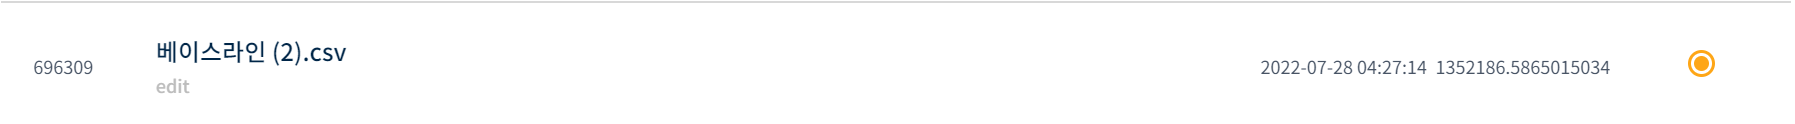